<a href="https://colab.research.google.com/github/yuu19/advanced_data_lecture/blob/main/Chap_6_Applied_Data_Science_20230602.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ver 1.0

About version：The version is 1.0 when released in the google classroom and it will be updated if there are any changes.

#6. <font color='crimson'>Unsupervised Learning </font>

**Today's highlight**：

- Principle Component Analysis (PCA)

- KMeans




## 6.1 <font color="Crimson">**Dimension Reduction**</font>

 Dimensionality compression or **Dimension Reduction** is used to literally reduce the dimensionality of data. Especially for data with many explanatory variables that are difficult to explain, dimensionality compression is used to

- Extracting data features

- Visualization of data that is difficult to do with high dimensionality

This enables the visualization of data that is difficult to visualize in higher dimensions. Let us consider the following case.

In [ ]:
import numpy as np
import pandas as pd

# Student Data Simulation
# The rows are data for each student, with grades for Chemistry, Math, Japanese, and English.
# Create high correlations for Chemistry, Math and high correlations for Math and Chemistry.

def sales_simulator(coef1=0.7,coef2=0.5, n=100, seed=1):
  np.random.seed(seed)
  x1 = np.random.uniform(24, 60, n)
  x2 = coef1 * x1 + np.random.normal(0, 5, n)
  x3 = np.random.uniform(40, 100, n)
  x4 = coef2 * x3+ np.random.normal(0, 10, n)
  df = pd.DataFrame(np.vstack([x1, x2, x3, x4]).T, columns=['Chemistry', 'Math', 'Japanese','English']  )

  return df

df = sales_simulator()
df.head()

,Chemistry,Math,Japanese,English
0,39.012792,28.887129,40.931997,28.416259
1,49.931682,24.841171,75.608884,34.060059
2,24.004117,15.271862,66.020581,34.350772
3,34.883973,28.558654,88.441632,56.241364
4,29.283212,21.648722,58.914688,32.304825


Next, each student visualizes the relationship between Chemistry and the remaining three explanatory variables, as well as "math" and "English" scores, and produces a correlation matrix.

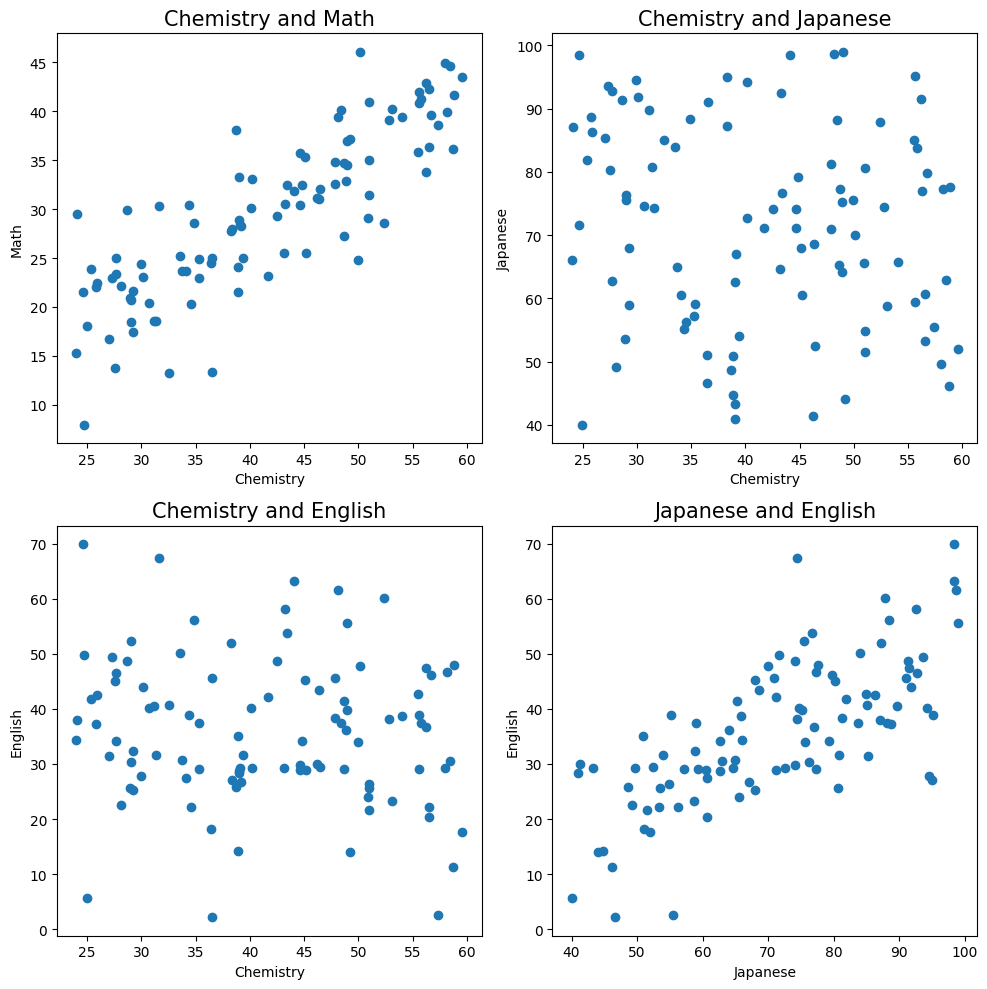

,Chemistry,Math,Japanese,English
Chemistry,1.000000,0.841161,-0.142505,-0.127744
Math,0.841161,1.000000,-0.045383,0.012257
Japanese,-0.142505,-0.045383,1.000000,0.710310
English,-0.127744,0.012257,0.710310,1.000000


In [ ]:
import matplotlib.pyplot as plt
relations_iloc = [[0,1], [0,2], [0,3], [2,3] ]

plt.figure(figsize=(10,10))
for i, r in enumerate(relations_iloc):
  plt.subplot(2,2, i+1)
  plt.scatter(df.iloc[:,r[0]], df.iloc[:,r[1]] )
  n1 = df.columns[r[0]]
  n2 = df.columns[r[1]]
  plt.title('%s and %s' % (n1, n2), fontsize=15 )
  plt.xlabel(n1)
  plt.ylabel(n2)

plt.tight_layout()
plt.show()

display(df.corr())

In [ ]:
df.corr()

,Chemistry,Math,Japanese,English
Chemistry,1.000000,0.841161,-0.142505,-0.127744
Math,0.841161,1.000000,-0.045383,0.012257
Japanese,-0.142505,-0.045383,1.000000,0.710310
English,-0.127744,0.012257,0.710310,1.000000


From the figure and the correlation matrix, we can see that there is a high correlation between "chemistry" and "math" and between "japanese" and "english". The results are as designed in the simulation.

Dimension reduction involves dropping information into a lower dimension while retaining as much information as possible. Intuitively, it is illustrated by the following diagram

<div align="center">

<img src="https://drive.google.com/uc?export=view&id=11sWqC_PPwJbxUd7bUkOncUatNxG7H-dT" width="40%">

**Figure. Dimension Reduction**
</div>

For example, when we want to reduce the four variables generated by the simulation by half, we can exclude "grip strength" and "math" or "softball throwing" and "chemistry" in variable selection, but in dimension reduction, we construct "feature 1" and "feature 2" from the four variables.

　In general, dimension reduction from $p$-dimension to $k$($\leq p$)-dimension can be expressed by the following equation

<br><br>
$$
z_1 = f_1(x_1, x_2, x_3,..., x_p)
$$
<br>
$$
... \tag{6.1}
$$
<br>
$$
z_k = f_k(x_1, x_2, x_3,..., x_p)
$$
<br>

The $f_k()$ is the $k$-th function. The $k$ dimension can generally be determined by the analyst with reference to several indices.

In this lecture, we will start with **Principal Component Analysis**, the most famous method of dimension reduction.

<a name='section_pca'></a>
###<font color="Crimson">**PCA: Principle Component Analysis**</font>

Principal Component Analysis is a technique for summarizing data into fewer indicators without compromising the information in the data as much as possible. The following figure shows how the information can be summarized, using the "Math" and "Chemistry" grades generated by the simulation as an example.

<div align="center">

<img src="https://drive.google.com/uc?export=view&id=11u1x06qdkJdOvQ5dQFHBY6Cv2Tw-_iv6" width="100%">

(a) PCA

<img src="https://drive.google.com/uc?export=view&id=11u4XlrV78PbWA0RxT5L9shuVwAt99Cp_" width="50%">

(b) Projected (Rotated) dimension

**Figure PCA**
</div>

In this figure, the "Math" and "Chemistry" grades are approximately summarized on the **Step 1** straight line, which is the first principal component. The first principal component is interpreted as "academic performance in science and mathematics". In **Step 2**, we take the component orthogonal to the first principal component and make it the second principal component. If we take two principal components, the number of principal components will match the number of original variables, and this will not result in dimension reduction, but if we cut the second principal component because it does not contain much information, then this will result in dimension reduction.

As explained in the 2-dimensional example, even in multiple dimensions**"Information of the first principal component"$>$ "Information of the second principal component"$>$ ... $>$ "Information of the $k$th principal component "** summarizes to $k$ principal components.

$i^{th}$ principal component with $p$ variables $X=(X_1, X_2, ..., X_p)$, can be defined as follows。
<br><br>
$$
Z_i = c_{i1}X_1 + c_{i2}X_2 + ... c_{ip}X_p \tag{6.2}
$$
<br>

The $i^{th}$ principal component score, $C_i=(c_{i1}, c_{i2}, ... , c_{ip})$ is called the **principal component vector**.


The details of the process of computing $Z_i$ will be omitted, but the outline is:

- 1. computation of the correlation matrix

- 2. compute eigenvalues and eigenvectors of the correlation matrix

- 3. select $m$ of $p$ eigenvalues from the largest ($m<p$)

- 4. computing the principal component score $Z$ (inner product of the data minus the mean and $m$ eigenvectors)


To calculate the correlation matrix, the data must be standardised (mean = 0, variance = 1). Standardisation of the data is explained here.

###<font color="Crimson">**Data normalization**</font>

Data normalization is recommended not only for dimensional compression, but also for data analysis in general. Usually, the units of the data are not aligned, so variances cannot be compared between variables. Therefore, the process of aligning the units and unifying the scale of the data is called **data normalization**. As part of data normalization, this lecture introduces a method for scaling variables to **mean 0, variance 1**. For $n$ data $x_i,i=1,\ldots,n$, the standardisation $u_i$ is
<br><br>
$$
u_i = \frac{x_i - \bar{x}} {s}, i=1,\ldots,n \tag{6.3}
$$
<br>

Suppose. where $\bar{x}$ is the mean of $x$ and $s$ is the standard deviation of $x$. Standardisation can be performed with **StandardScaler()** in **scikit-learn**.

In [ ]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
df2 = df.copy()
df2[df2.columns] = scalar.fit_transform(df)
print('sklearn')
display(df2.head())


sklearn


,Chemistry,Math,Japanese,English
0,-0.233884,-0.069703,-1.895677,-0.575733
1,0.796350,-0.559026,0.274127,-0.143572
2,-1.650003,-1.716349,-0.325833,-0.121312
3,-0.623452,-0.109430,1.077098,1.554909
4,-1.151903,-0.945125,-0.770463,-0.277975


### <font color='crimson'>**[Practice 1]Your own normalization** (10 mins)</font>

Make your own normalization function with only `numpy` and `pandas` module, according to formula (6.3).

You need calculate the `mean` and `std` for each row independently.



In [ ]:
# P1

def my_normalization(df):
  # Start from here
  return (df - df.mean()) / df.std()

my_normalization(df)

,Chemistry,Math,Japanese,English
0,-0.232712,-0.069354,-1.886174,-0.572847
1,0.792358,-0.556224,0.272753,-0.142853
2,-1.641733,-1.707746,-0.324199,-0.120703
3,-0.620327,-0.108881,1.071699,1.547115
4,-1.146129,-0.940387,-0.766601,-0.276582
...,...,...,...,...
95,-0.841040,-1.946080,0.863136,0.358742
96,1.411028,0.826353,-1.114734,-1.048431
97,0.296742,0.758193,-0.004158,-0.539338
98,-1.632418,0.006076,0.989277,0.156103


- **Apply PCA model**

You can use **PCA** using `sklearn.decomposition.PCA`.

In [ ]:
from sklearn.decomposition import PCA

K=4
pca = PCA(n_components=K)

pca.fit(df2)

pca.components_ # Principle component vectors for 4 dimensions.


array([[-0.61243506, -0.56038746,  0.40656245,  0.38157064],
       [-0.34704671, -0.44241846, -0.5730878 , -0.59615003],
       [-0.12063651,  0.08590431, -0.70972044,  0.68874101],
       [-0.69994907,  0.69487571,  0.05073702, -0.15698663]])

We add explanations for the data.

In [ ]:
eig_vec = pd.DataFrame(model.components_.T, index = df2.columns, columns = ["PC %i" % (x + 1) for x in range(K)])
display(eig_vec)

,PC 1,PC 2,PC 3,PC 4
Chemistry,-0.612435,-0.347047,-0.120637,-0.699949
Math,-0.560387,-0.442418,0.085904,0.694876
Japanese,0.406562,-0.573088,-0.709720,0.050737
English,0.381571,-0.596150,0.688741,-0.156987


- Explained variance (Eigen Value)

In [ ]:
eig_val = pd.DataFrame(model.explained_variance_, index=["PC%i"%(x + 1) for x in range(K)])
display(eig_val)

,0
PC1,1.963501
PC2,1.633901
PC3,0.294907
PC4,0.148096


The bigger the value, the more information contains in the component.

In this case, we can say compress the data to 2 dimension is enough.

The explained variance can be scaled to the probability - Contribution ratio as shown below.

In [ ]:
display(pca.explained_variance_ratio_)
display(pca.explained_variance_ratio_.cumsum())

array([0.48596649, 0.40439039, 0.0729894 , 0.03665372])

array([0.48596649, 0.89035689, 0.96334628, 1.        ])

In [ ]:
# Contribution ratio
ev = pd.DataFrame(pca.explained_variance_ratio_, index=["PC%i" % (x + 1) for x in range(len(df.columns))], columns=['Contribution']).T
t_ev = pd.DataFrame(pca.explained_variance_ratio_.cumsum(), index=["PC%i" %(x + 1) for x in range(len(df.columns))], columns=['Cum. Contribution']).T
display(pd.concat([ev,t_ev], axis=0))

,PC1,PC2,PC3,PC4
Contribution,0.485966,0.404390,0.072989,0.036654
Cum. Contribution,0.485966,0.890357,0.963346,1.000000


Last, we can compute the pca_score using `pca.transform()`.

pca_score can be interpreted as the projected data from the original to new dimension PC1, PC2, ....

In [ ]:
df2

,Chemistry,Math,Japanese,English
0,-0.233884,-0.069703,-1.895677,-0.575733
1,0.796350,-0.559026,0.274127,-0.143572
2,-1.650003,-1.716349,-0.325833,-0.121312
3,-0.623452,-0.109430,1.077098,1.554909
4,-1.151903,-0.945125,-0.770463,-0.277975
...,...,...,...,...
95,-0.845277,-1.955884,0.867484,0.360549
96,1.418136,0.830516,-1.120349,-1.053712
97,0.298237,0.762012,-0.004179,-0.542055
98,-1.640642,0.006106,0.994261,0.156889


In [ ]:
pca_score = pca.transform(df2)
pd.DataFrame(pca_score)

,0,1,2,3
0,-0.808094,1.541619,0.971097,0.109473
1,-0.117774,-0.100555,-0.437529,-0.909411
2,1.793580,1.591024,0.199307,-0.035219
3,1.474363,-1.279450,0.372302,0.170894
4,0.815793,1.425163,0.413132,0.154077
...,...,...,...,...
95,2.103992,0.446584,-0.433394,-0.780033
96,-2.191485,0.410634,-0.030334,-0.306942
97,-0.818205,-0.115089,-0.340888,0.405636
98,1.465458,-0.096651,-0.399145,1.178425


Here is the code to visualize the principle component vector and the principle score for the first two dimension - PC1 and PC2.

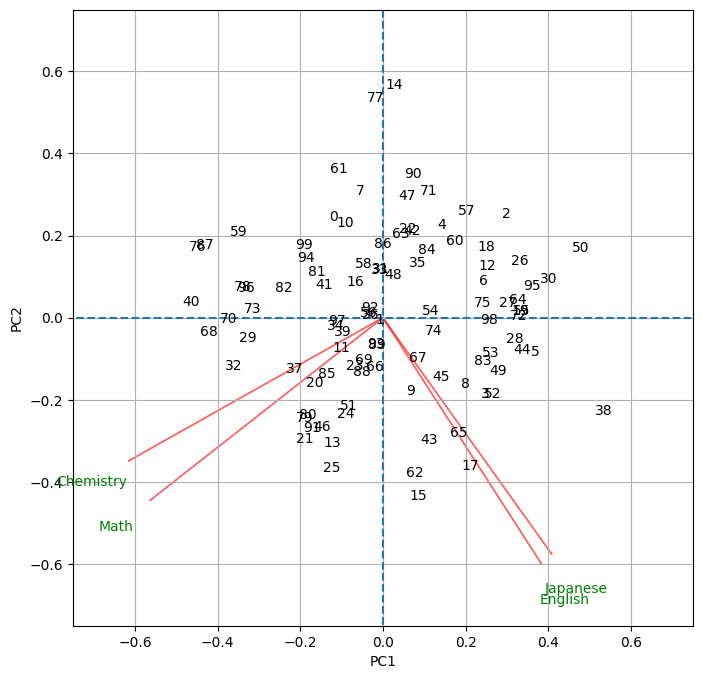

In [ ]:
plt.figure(figsize=(8,8))
def myplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())

    count = 0
    xs_pos = xs * scalex
    ys_pos = ys * scaley
    for i in range(xs.shape[0]):
      plt.text(xs_pos[i], ys_pos[i], count)
      count += 1

    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'g', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
    plt.xlim(-0.75,0.75)
    plt.ylim(-0.75,0.75)
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.grid()
    plt.vlines(0, -5, 5, ls='--')
    plt.hlines(0, -5, 5, ls='--')



myplot(pca_score[:,0:2],pca.components_[0:2, :].T, df2.columns )
plt.show()

Print the student #50.

In [ ]:
df.iloc[17]

Chemistry    44.112834
Math         31.804766
Japanese     98.427012
English      63.211946
Name: 17, dtype: float64

> Why we need the data normalization before fit to PCA?

Let's change the scale of `Math` and `English`.

In [ ]:
df3 = df.copy()
df3['Math'] /= 100
df3['English'] /= 100
df3

,Chemistry,Math,Japanese,English
0,39.012792,0.288871,40.931997,0.284163
1,49.931682,0.248412,75.608884,0.340601
2,24.004117,0.152719,66.020581,0.343508
3,34.883973,0.285587,88.441632,0.562414
4,29.283212,0.216487,58.914688,0.323048
...,...,...,...,...
95,32.532971,0.132913,85.091669,0.406436
96,56.521663,0.363306,53.322948,0.221741
97,44.652462,0.357642,71.161109,0.288561
98,24.103332,0.295140,87.117762,0.379839


### <font color='crimson'>**[Practice 2]PCA without normalization** (10 mins)</font>

1. Fit the PCA  **without data normalization** using df3.

1. Print the **contribution ratio**.

1. Visualize the principle component vectors and principle scores using the `myplot` function.



,PC1,PC2,PC3,PC4
Contribution,0.485966,0.404390,0.072989,0.036654
Cum. Contribution,0.485966,0.890357,0.963346,1.000000


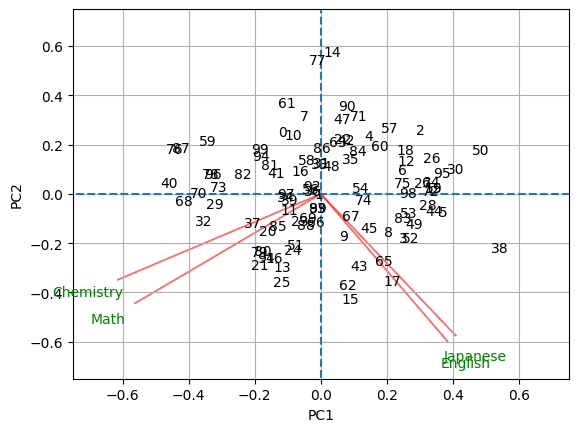

In [ ]:

from sklearn.decomposition import PCA

# From here
from sklearn.decomposition import PCA

K=4
pca = PCA(n_components=K)
df3 = my_normalization(df3)

pca.fit(df3)

pca.components_ # Principle component vectors for 4 dimensions.


# Q2
# Contribution ratio
ev = pd.DataFrame(pca.explained_variance_ratio_, index=["PC%i" % (x + 1) for x in range(len(df.columns))], columns=['Contribution']).T
t_ev = pd.DataFrame(pca.explained_variance_ratio_.cumsum(), index=["PC%i" %(x + 1) for x in range(len(df.columns))], columns=['Cum. Contribution']).T
display(pd.concat([ev,t_ev], axis=0))

# q3
pca_score = pca.transform(df3)
myplot(pca_score[:,0:2],pca.components_[0:2, :].T, df3.columns )
plt.show()

Besides PCA, there are several popular dimension reduction methods, such as

- **Singular value decomposition (SVD)**

- **Factor Analysis**

- **Multi Dimensional Scaling(MDS)**

They are all available in `sklearn`. Learn and try the models based on your own interest.

- **Understanding the dimension reduction using image**

In [ ]:
! pip install Pillow #<-　Module for image
!wget https://raw.githubusercontent.com/dgod1028/Tohoku_PBL/main/Dataset/inu.png #<- Download Image


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
--2023-06-02 02:29:34--  https://raw.githubusercontent.com/dgod1028/Tohoku_PBL/main/Dataset/inu.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 22576 (22K) [image/png]
Saving to: ‘inu.png’

inu.png             100%[===================>]  22.05K  --.-KB/s    in 0s      

2023-06-02 02:29:34 (82.2 MB/s) - ‘inu.png’ saved [22576/22576]



(500, 500)

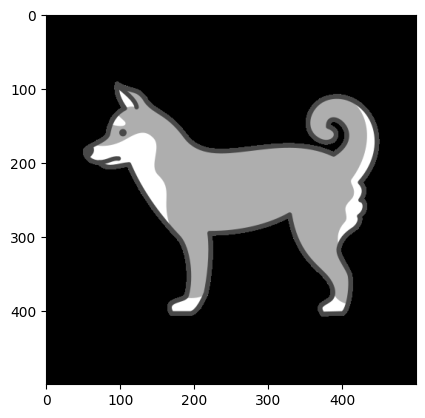

In [ ]:
from PIL import Image
img = Image.open('inu.png') # Open the file
gray_img = img.convert('L')

import numpy as np
from scipy import linalg

data = np.asarray(gray_img)
display(data.shape)
plt.imshow(data)
plt.gray()


$$
X = Z[:,:K] \cdot P[:K,:]
$$

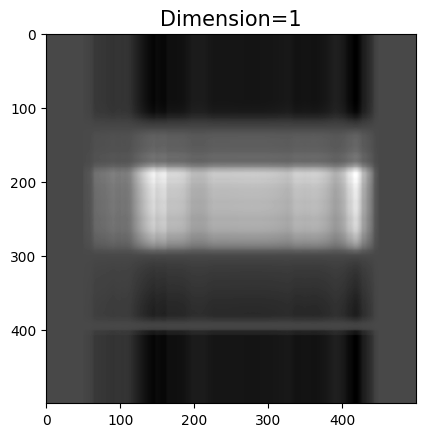

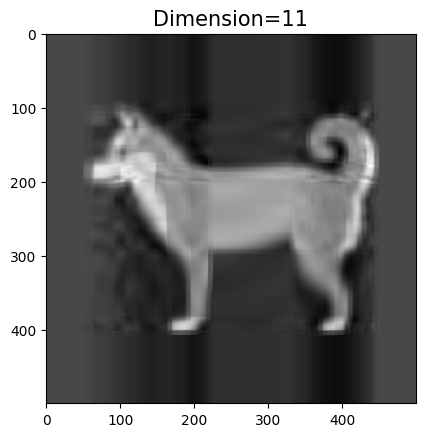

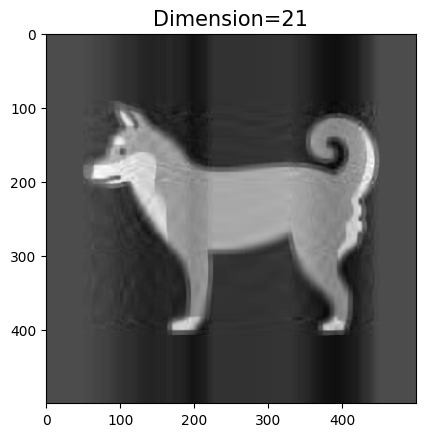

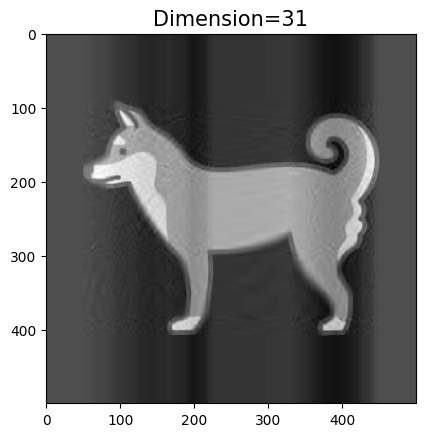

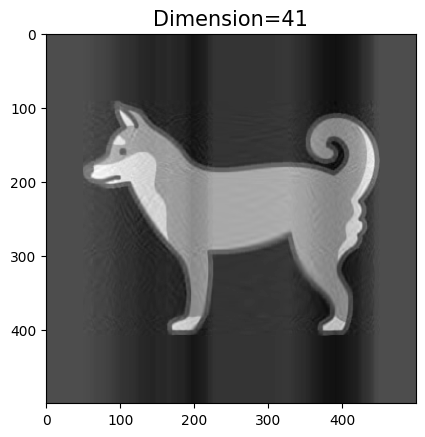

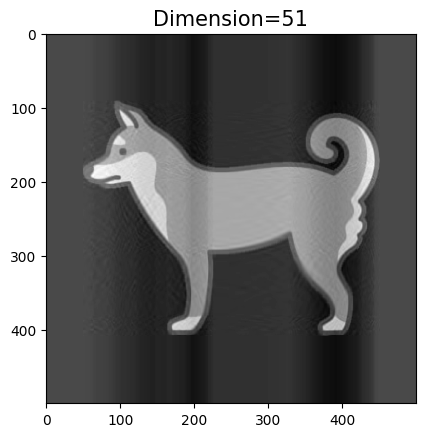

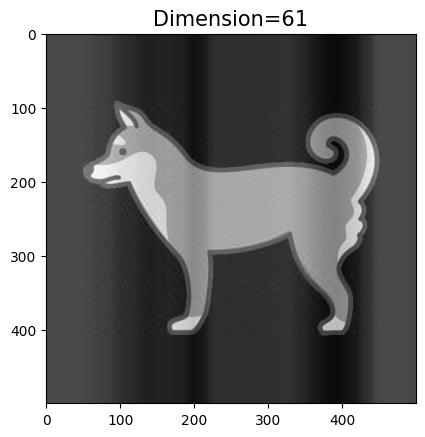

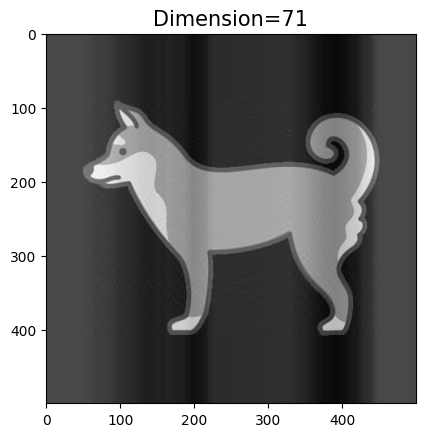

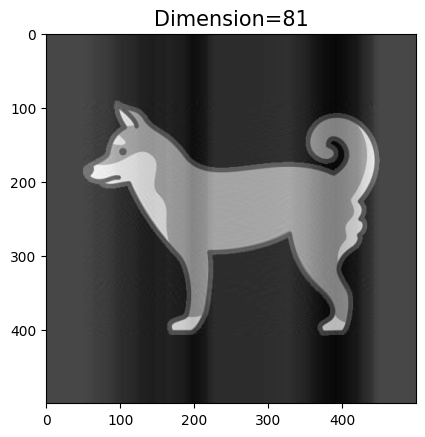

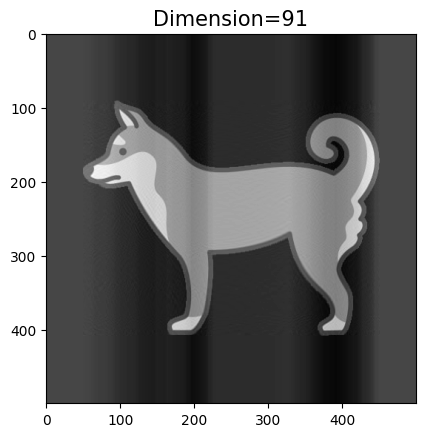

In [ ]:


pca = PCA(500)
pca.fit(data)

for k in range(1, 100, 10):
  z = pca.transform(data)[:,:k]
  p = pca.components_[:k]

  plt.imshow(z.dot(p))
  plt.title("Dimension={}".format(k), fontsize=15)
  plt.show()



In [ ]:
500 * 500

250000

In [ ]:
pca.transform(data)[:,:20].shape

(500, 20)

In [ ]:
# Contribution ratio
ev = pd.DataFrame(pca.explained_variance_ratio_, index=["PC%i" % (x + 1) for x in range(500)], columns=['Contribution']).T
t_ev = pd.DataFrame(pca.explained_variance_ratio_.cumsum(), index=["PC%i" %(x + 1) for x in range(500)], columns=['Cum. Contribution']).T
display(pd.concat([ev,t_ev], axis=0))

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC491,PC492,PC493,PC494,PC495,PC496,PC497,PC498,PC499,PC500
Contribution,0.580657,0.183862,0.073109,0.036912,0.02365,0.020639,0.017957,0.012893,0.007293,0.005758,...,5.252419e-33,5.252419e-33,5.252419e-33,5.252419e-33,5.252419e-33,5.252419e-33,5.252419e-33,5.224762e-33,2.604988e-33,1.051543e-34
Cum. Contribution,0.580657,0.764519,0.837628,0.874539,0.89819,0.918829,0.936786,0.949679,0.956973,0.962731,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


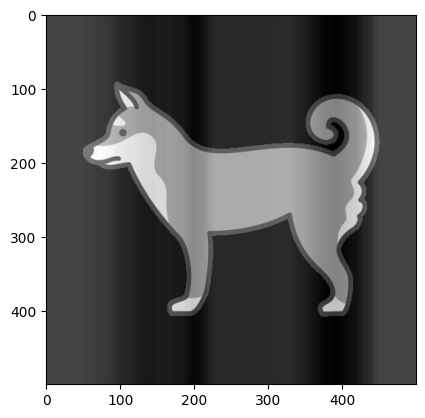

In [ ]:



z = pca.transform(data)
plt.imshow(z.dot(pca.components_))
plt.show()

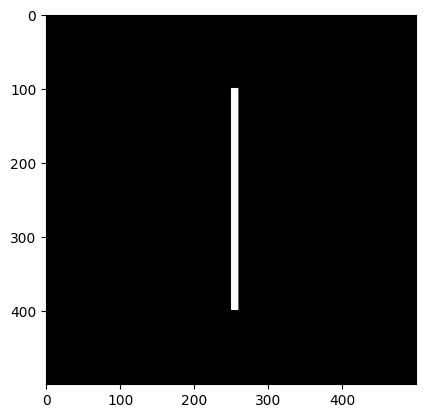

In [ ]:
# Simple image

simg = np.zeros((500, 500))
simg[100:400, 250:260] = 1#np.random.uniform(0,1, 300*10).reshape(300,-1)

plt.imshow(simg)
plt.show()

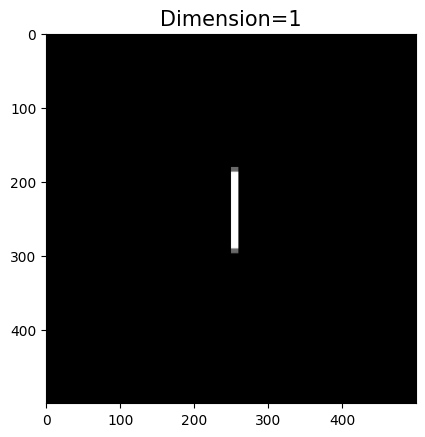

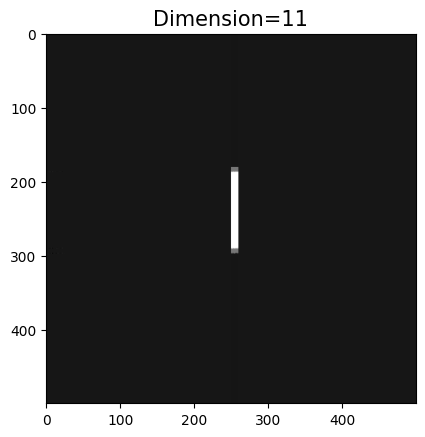

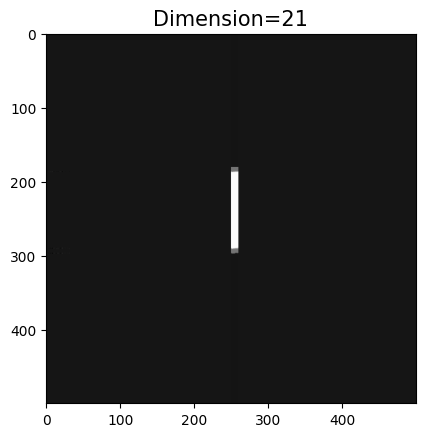

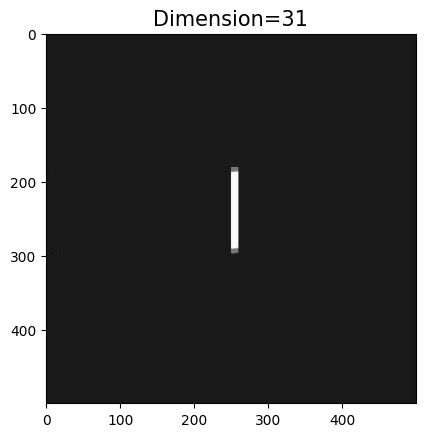

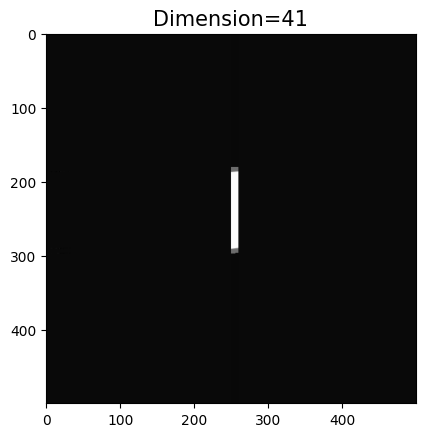

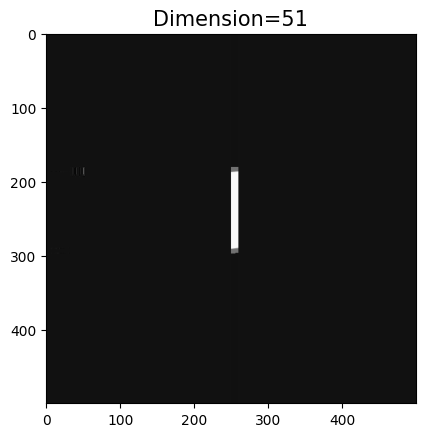

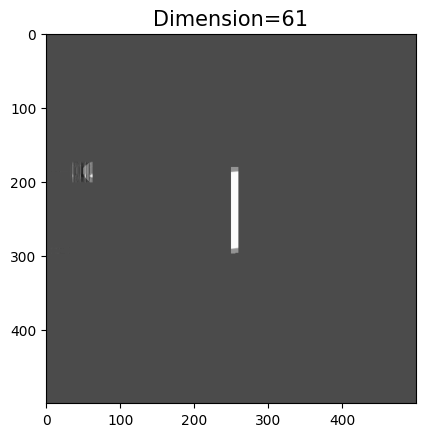

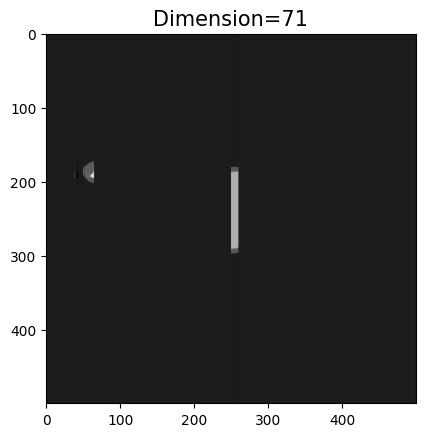

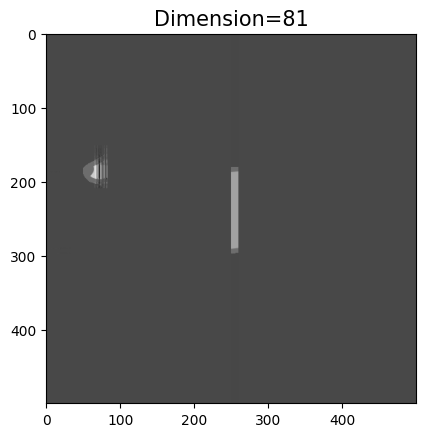

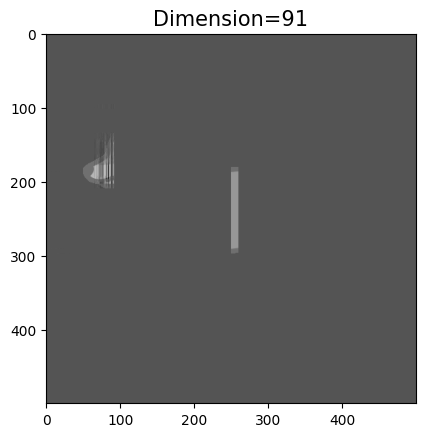

In [ ]:


pca = PCA(500)
pca.fit(simg)

for k in range(1, 100, 10):
  z = pca.transform(data)[:,:k]
  p = pca.components_[:k]

  plt.imshow(z.dot(p))
  plt.title("Dimension={}".format(k), fontsize=15)
  plt.show()



In [ ]:
# Contribution ratio
ev = pd.DataFrame(pca.explained_variance_ratio_, index=["PC%i" % (x + 1) for x in range(500)], columns=['Contribution']).T
t_ev = pd.DataFrame(pca.explained_variance_ratio_.cumsum(), index=["PC%i" %(x + 1) for x in range(500)], columns=['Cum. Contribution']).T
display(pd.concat([ev,t_ev], axis=0))

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC491,PC492,PC493,PC494,PC495,PC496,PC497,PC498,PC499,PC500
Contribution,1.0,5.498291e-29,2.980651e-29,2.610637e-29,2.507978e-29,1.672411e-29,1.069693e-29,8.446579e-30,6.562986e-30,5.412702e-30,...,9.954069e-33,9.954069e-33,9.954069e-33,9.954069e-33,9.954069e-33,9.954069e-33,9.954069e-33,6.944534e-33,3.982198e-33,1.473639e-34
Cum. Contribution,1.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


## 6.2 <font color="Crimson">**Clustering**</font>

Another unsupervised learning, cluster analysis, is introduced in this section. While we learnt about supervised learning classification problems in the previous lecture, **cluster analysis** is an unsupervised classification problem. Cluster analysis aims to look at similarities in the data and divide them into several clusters. In this lecture, the Kmeans method is introduced.

### <font color="Crimson">**KMeans**</font>

The name of the method derives from the fact that it "uses the mean of the clusters (means) to classify the data into $k$ number of clusters predetermined by the analyst" Kmeans mainly clusters the data in the following steps.

- 1. determine the number $K$ of clusters.

- 2. randomly determine $K$ central 'core' data for each cluster from the data.

- 3. calculate the distance from all the data to each 'kernel' data individually.

- 4. classify each data into clusters of the 'kernel' data with the closest distance

- 5. recalculate the centre of gravity of each cluster based on the data belonging to each cluster and make that centre of gravity the new 'kernel'.

- 6. If the 'kernel' of the cluster changes beyond a pre-determined tolerance, repeat steps 2 to 5. When the positions of the 'nuclei' of the clusters converge (i.e. the changes are kept within the tolerance values), the training is terminated.For simpler way,just loop for a certain times.

There are several ways to calculate the distance between data individuals, but **Euclidean distance** is one of the most commonly used methods and is defined as follows.
<br><br>
$$
d_{ij} =\sqrt{\sum_{m=1}^p (x_{im} - x_{jm})^2} \tag{6.4}
$$
<br>
$D_{IJ}$ is the distance between data $i$ and data $j$ and $P$ is the dimension of the explanatory variable.

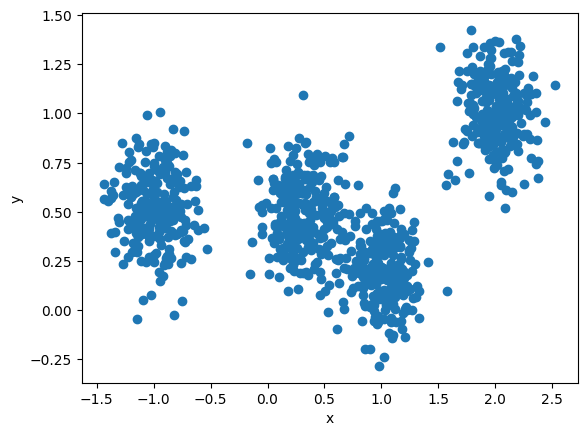

In [ ]:
import numpy as np
import pandas as pd

# We generate 4 types of data group

def cluster_simulator(n=1000, seed=1):
  np.random.seed(seed)
  normals = [ [2, 1], [1, 0.2], [-1, 0.5], [0.3, 0.5] ]
  df = []
  for i in range(len(normals)):
    df.append(np.random.multivariate_normal( normals[i],np.eye(2) * 0.03, int(n/4) ) )

  df = pd.DataFrame( np.concatenate(df) , columns=['x','y'])
  return df

df = cluster_simulator()
plt.scatter(df['x'], df['y'])
plt.xlabel('x')
plt.ylabel('y')
plt.show()

- KMeans can easily applied by using `sklearn.cluster.KMeans`.

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(3)
cluster = kmeans.fit(df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Then we can obtain the clustered number for each data by using `labels_`.

In [ ]:
kmeans.labels_

NameError: ignored

Let's try with different cluster numbers and visualize the results.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


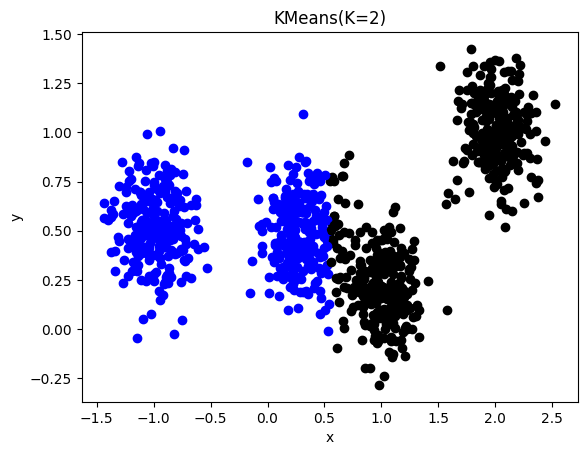

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


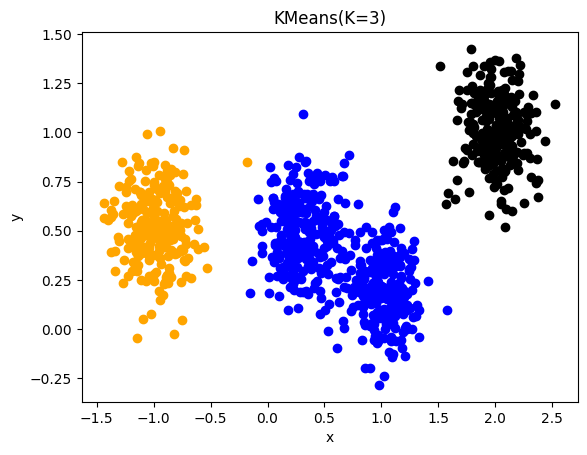

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


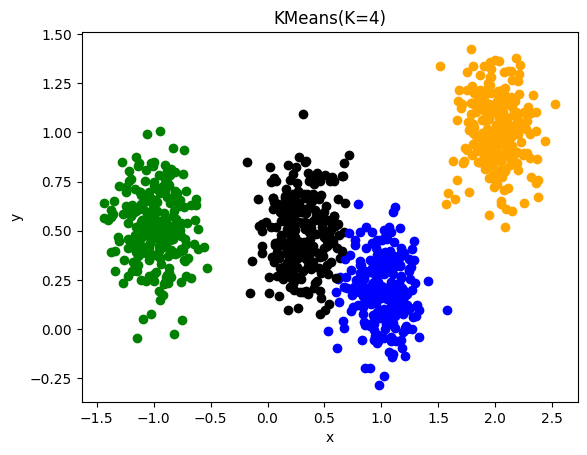

In [ ]:
from sklearn.cluster import KMeans

colors= ['black','blue','orange','green','grey','purple','red','brown']

def plot_cluster(data, k=3, seed=1):
  np.random.seed(seed)
  kmeans = KMeans(k)
  cluster = kmeans.fit(data)

  labels = cluster.labels_
  for i in range(data.shape[0]):
    plt.scatter(data.iloc[i,0], data.iloc[i,1], color=colors[labels[i]] )

  plt.title('KMeans(K=%i)' %k)
  plt.xlabel('x')
  plt.ylabel('y')
  plt.show()

plot_cluster(df, k=2, seed=1)
plot_cluster(df, k=3, seed=1)
plot_cluster(df, k=4, seed=1)


Though there are some criterion how to define the cluster number, there is no answer for the cluster number $K$.

There are also several clustering methods, such as

- Gaussian Mixture

- Mean shift